In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


plt.rcParams['figure.dpi'] = 100


df = pd.read_csv('train.csv')



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


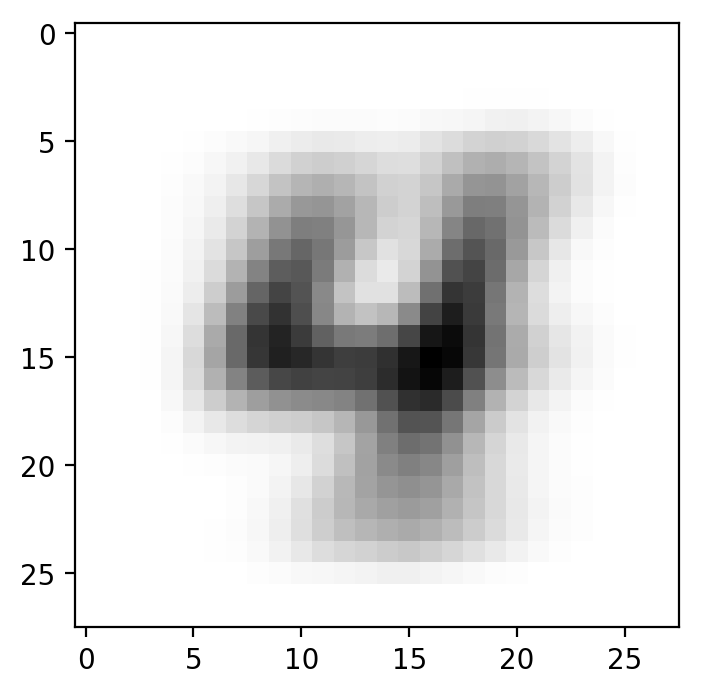

In [4]:
digit = 4

M = df[df['label'] == digit].as_matrix()[:, 1:]

im = M.mean(axis=0)

im = im.reshape(28,28)

#plt.imshow(im, cmap='gray')
plt.imshow(255 - im, cmap='gray')

plt.savefig('digit_img.png')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


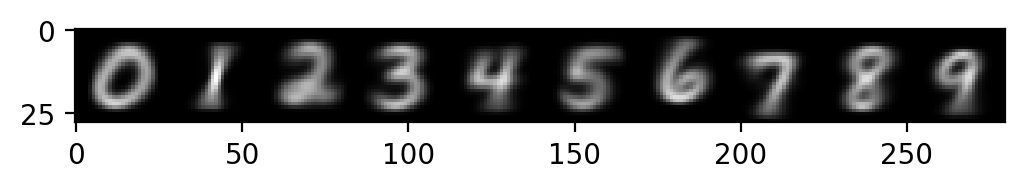

In [5]:
meanImage = np.empty([28,28])
for i in range(10):
    M = df[df['label'] == i].as_matrix()[:, 1:]
    im = M.mean(axis=0)
    im = im.reshape(28,28)
    #plt.imshow(im, cmap='gray')
    if i == 0:
        meanImage = im
    else:
        meanImage = np.concatenate([meanImage, im], axis=1)
    
plt.imshow(meanImage, cmap='gray')



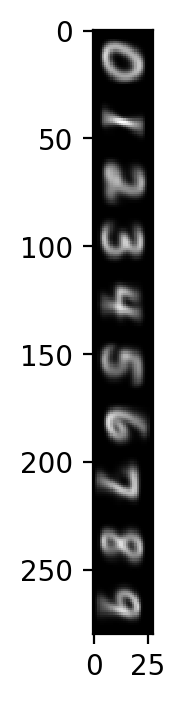

In [6]:
plt.imshow(np.rot90(meanImage, -1), cmap='gray')

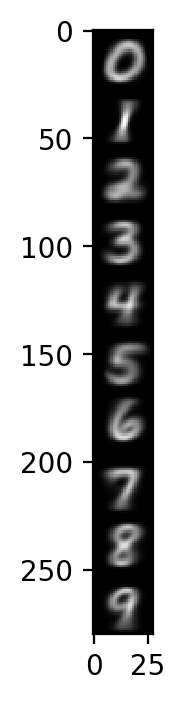

In [7]:
rotImage = np.rot90(meanImage, -1)
rotImage2 = np.empty((28,28), dtype=rotImage.dtype)
for i in range(10):
    rowStart = i*28
    rowEnd = (i+1) * 28
    subImageToRotate = rotImage[rowStart:rowEnd, :]
    rotatedSubImage = np.rot90(subImageToRotate, 1)
    if i == 0:
        rotImage2 = rotatedSubImage
    else:
        rotImage2 = np.concatenate([rotImage2, rotatedSubImage], axis=0)
    #print (subImageToRotate.shape)
plt.imshow(rotImage2, cmap='gray')

(256,)
(16, 16)
(2, 8, 16)
(2, 16, 8)


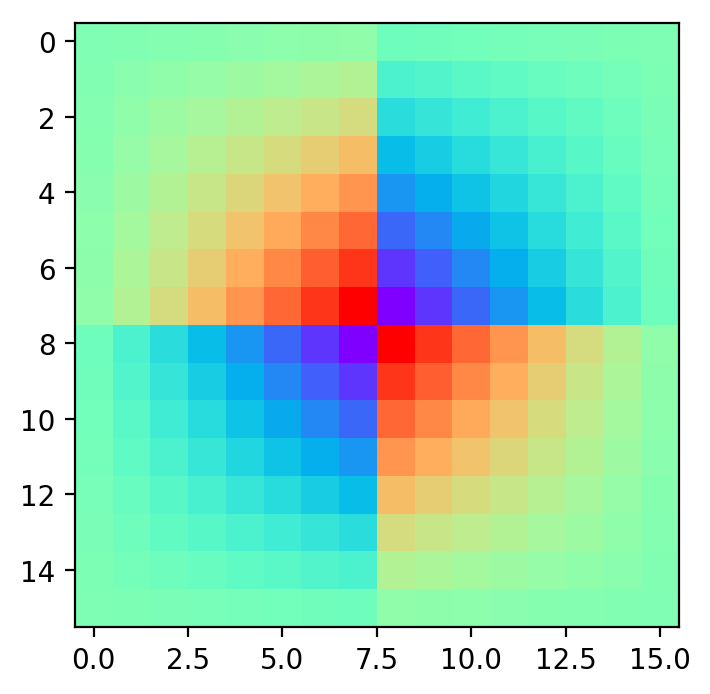

In [244]:
#rowSplits1 = np.split(meanImage,1)
plt.rcParams['figure.dpi'] = 100

img = np.arange(256,dtype=np.float64)
##img = np.concatenate([img, img*2])
#img = np.sort(img, -1)
#print(img)
##img = img * 255 / 16

print(img.shape)

img = np.reshape(img,[16,16])
print(img.shape)

#img = np.concatenate(np.split(img,[64], axis=1))
#print(img.shape)

#img = np.array(np.split(img, [64]))
#print(img.shape)

img = (img + img.T)/2

#img = (img + np.rot90(img, -1))/2

img = np.dot(img,img)

img = (img + np.rot90(img, 2))/2

images = np.array(np.split(img,[8],axis=0))
print(images.shape)

img = np.concatenate(np.flip(images,axis=1), axis=0)
img = np.concatenate(np.flip(images,axis=0), axis=0)

images = np.array(np.split(img,[8],axis=1))
print(images.shape)

img = np.concatenate(np.flip(images,axis=1), axis=1)
img = np.concatenate(np.flip(images,axis=0), axis=1)

plt.imshow(img, cmap='rainbow') 
#img
